### Table of content:
1. [Imports](#1.-Imports)  
2. [Load the dataset](#2.-Load-the-dataset)  
3. [Basic usage](#3.-Basic-usage)   
    3.1. [Display images](#3.1-Display-images)  
    3.2. [Display class representations](#3.2-Display-class-representations)  
    3.3. [Display images in class tabs layout](#3.3-Display-images-in-class-tabs-layout)  
4. [Different sequence and data types](#4.-Different-sequence-and-data-types)  
    4.1. [Sequence types](#4.1-Sequence-types)  
    4.2. [Image types](#4.2-Image-types)  
5. [Sort, filter, ignore labels](#4.-Sort,-filter,-ignore-labels)  
6. [Force convert images to base64 strings](#5.-Force-convert-images-to-base64-strings)  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.append('../')
    import ipyplot
except:
    ! {sys.executable} -m pip install ipyplot
    import ipyplot

  Cloning https://github.com/karolzak/ipyplot to c:\users\karol\appdata\local\temp\pip-req-build-st50f8r7
  Created wheel for ipyplot: filename=ipyplot-0.0.1-cp36-none-any.whl size=4690 sha256=5689ca05cc6ffabbdf1c5904050cfbc6bd4451f41b37487df9837f73972bfc14
  Stored in directory: C:\Users\karol\AppData\Local\Temp\pip-ephem-wheel-cache-xqnjxgp7\wheels\1e\7c\d8\88b9fa77fd2c5ed1fc1599eced6e121d76891a3c008e91df25
Successfully built ipyplot


  Running command git clone -q https://github.com/karolzak/ipyplot 'C:\Users\karol\AppData\Local\Temp\pip-req-build-st50f8r7'


In [3]:
import glob
import os
import urllib.request
import zipfile

## 2. Load the dataset
[[back to the top](#Table-of-content:)]

In [ ]:
datasets_dir = '../datasets/'
zip_filename = 'gear_images.zip'

In [4]:
print('Downloading the data into `datasets` folder..')
url = 'https://privdatastorage.blob.core.windows.net/github/ipyplot/gear_images.zip'
urllib.request.urlretrieve(url, datasets_dir + zip_filename)
print("Done!")

Done!


In [5]:
with zipfile.ZipFile(datasets_dir + zip_filename, 'r') as zip_ref:
    os.makedirs(datasets_dir, exist_ok=True)
    zip_ref.extractall(datasets_dir)

In [58]:
images = glob.glob(datasets_dir + 'gear_images' + '/**/*.*')
images = [image.replace('\\', '/') for image in images]

In [59]:
labels = [image.split('/')[-2] for image in images]

## 3. Basic usage
### 3.1 Display images  
[[back to the top](#Table-of-content:)]

Displays images based on provided list.  
max_images param limits the number of displayed images (takes top n images only)

In [72]:
ipyplot.plot_images(images, max_images=15, img_width=150)

### 3.2 Display class representations
[[back to the top](#Table-of-content:)]

Displays first image for each class/label

In [61]:
ipyplot.plot_class_representations(images, labels, img_width=150)

### 3.3 Display images in class tabs layout
[[back to the top](#Table-of-content:)]

Displays top N images (max_imgs_per_tab) in separate tab for each label/class (based on provided labels list)

In [71]:
ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=10, img_width=150)

##  4. Different sequence and data types  
### 4.1 Sequence types   

[[back to the top](#Table-of-content:)]

IPyPlot currently support most common sequence types in python including:
- list
- numpy.ndarray
- pandas.Series

In previous examples we were using `images` object to store our images which was of simple python type `list`.
Now let's try using different sequence types.

#### Using numpy.ndarray as images sequence

In [70]:
import numpy as np

images_np = np.asarray(images)

ipyplot.plot_images(images_np, max_images=5)

#### Using pandas.Series as images sequence

In [69]:
import pandas as pd

images_df = pd.DataFrame()
images_df['images'] = images
images_df['labels'] = labels

ipyplot.plot_images(images_df['images'], max_images=5)

### 4.2 Image types   

[[back to the top](#Table-of-content:)]

IPyPlot supports passing in images using one of the following types:
- local image file URL
- external/remote image file URL
- PIL.Image objects
- numpy.ndarray objects

In previous examples we used local image files URLs so now we will focus more on other options.

#### Displaying images using images as PIL.Image objects


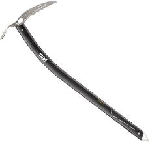
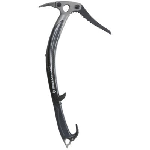
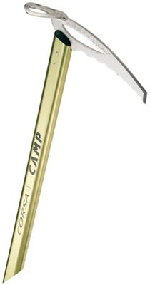
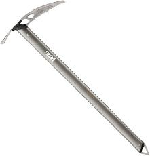
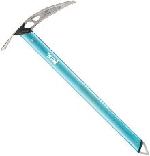


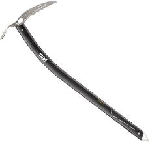
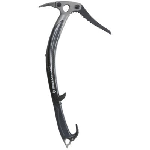
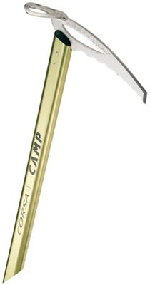
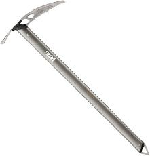
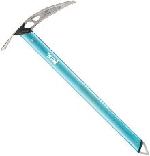

In [67]:
from PIL import Image

images_pil = [Image.open(image) for image in images]

ipyplot.plot_images(images_pil, max_images=5)

#### Displaying images using images as numpy.ndarray objects


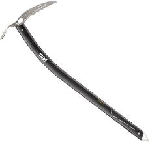
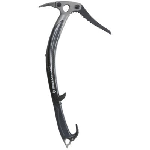
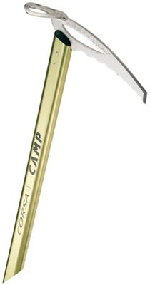
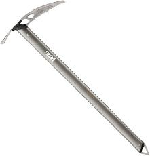
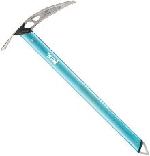


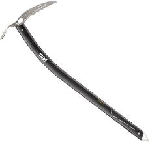
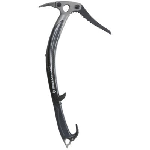
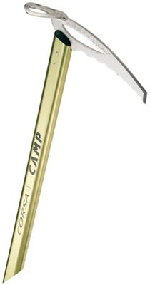
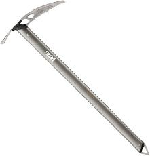
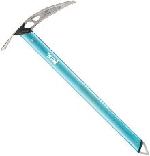

In [68]:
import numpy as np

images_np = [np.asarray(image) for image in images_pil]

ipyplot.plot_images(images_np, max_images=5)

## 4. Sort, filter, ignore labels
[[back to the top](#Table-of-content:)]

## 5. Force convert images to base64 strings
[[back to the top](#Table-of-content:)]